Let's use a Neural Network to built a model for prediction of total power of a wave

In [1]:
import tensorflow as tf
import numpy as np
tf.keras.utils.set_random_seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_perth_49 = pd.read_csv("WEC_Perth_49.csv")
df_sydney_49 = pd.read_csv("WEC_Sydney_49.csv")

Data = pd.concat([df_perth_49, df_sydney_49], ignore_index=True)

print(Data.shape)

2025-12-08 18:21:04.783050: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-08 18:21:04.786555: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-08 18:21:04.796089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765214464.811526   58470 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765214464.815978   58470 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-08 18:21:04.832183: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

(54007, 149)


In [3]:
# Access the data
target = Data['Total_Power'].values
features = Data.drop('Total_Power', axis=1).values


In [4]:

# Normalisation of features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Normalisation of target
target = scaler.fit_transform(target.reshape(-1, 1)).flatten()


In [4]:

## allow to stop earlier if no change in 5 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,  
    restore_best_weights=True
)


# Cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []

train_loss_histories = []
val_loss_histories = []

for train_index, val_index in kf.split(features):
    X_train, X_val = features[train_index, :], features[val_index, :]
    y_train, y_val = target[train_index], target[val_index]

    # Nouveau modèle pour chaque fold
    model = Sequential([
        Dense(64,activation ='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])

    # Entraînement
    history = model.fit(X_train, y_train, epochs=50, batch_size=200, callbacks=[early_stop], validation_data=(X_val, y_val))
    train_loss_histories.append(history.history['loss'])
    val_loss_histories.append(history.history['val_loss'])
    
    # Évaluation sur le fold de validation
    loss, mse = model.evaluate(X_val, y_val)
    mse_scores.append(mse)

print(f"MSE moyen sur 10 folds : {np.mean(mse_scores):.2f}")


Epoch 1/50


2025-12-08 18:17:49.436477: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2071 - mse: 0.2071 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 3/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 5/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 6/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 7/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 8/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 9/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 12/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 13/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 14/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4092e-04 - mse: 9.4092e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 15/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4610e-04 - mse: 9.4610e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 16/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 17/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 18/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.3880e-04 - mse: 9.3880e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 19/50
244/244 ━━━━━━━━━━━━━━━━

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2622e-04 - mse: 2.2622e-04 - val_loss: 4.4017e-04 - val_mse: 4.4017e-04
Epoch 36/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7356e-04 - mse: 1.7356e-04 - val_loss: 4.2676e-04 - val_mse: 4.2676e-04
Epoch 37/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6708e-04 - mse: 1.6708e-04 - val_loss: 2.9639e-04 - val_mse: 2.9639e-04
Epoch 38/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4757e-04 - mse: 1.4757e-04 - val_loss: 3.2570e-04 - val_mse: 3.2570e-04
Epoch 39/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4487e-04 - mse: 1.4487e-04 - val_loss: 4.1121e-04 - val_mse: 4.1121e-04
Epoch 40/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4214e-04 - mse: 2.4214e-04 - val_loss: 2.8751e-04 - val_mse: 2.8751e-04
Epoch 41/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3549e-04 - mse: 2.3549e-04 - val_loss: 3.7564e-04 - val_mse: 3.7564e-04
Epoch 42/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1399

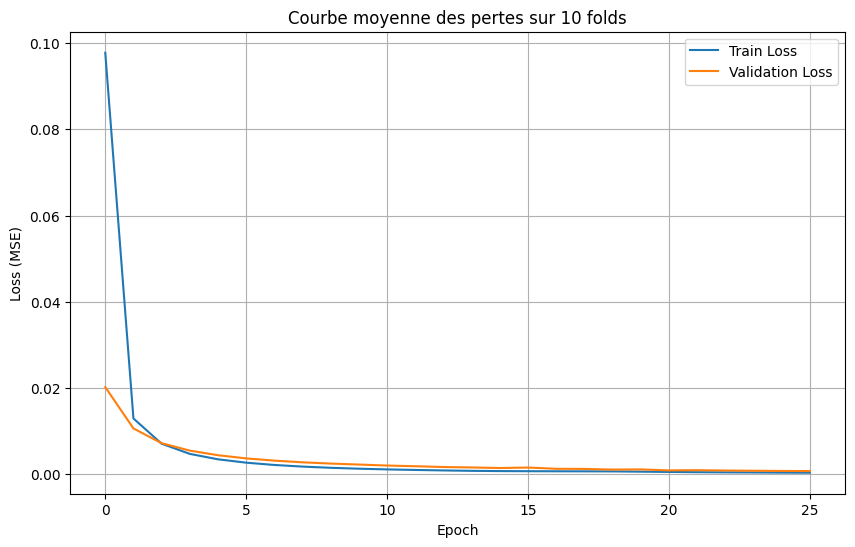

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Pour aligner toutes les courbes sur la même longueur (au cas où EarlyStopping stoppe à des moments différents)
max_len = min(len(l) for l in val_loss_histories)

avg_train_loss = np.mean([h[:max_len] for h in train_loss_histories], axis=0)
avg_val_loss = np.mean([h[:max_len] for h in val_loss_histories], axis=0)

plt.figure(figsize=(10,6))
plt.plot(avg_train_loss, label='Train Loss')
plt.plot(avg_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Courbe moyenne des pertes sur 10 folds')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
df_perth_100 = pd.read_csv("WEC_Perth_100.csv")
df_sydney_100 = pd.read_csv("WEC_Sydney_100.csv")

Data_100 = pd.concat([df_perth_100, df_sydney_100], ignore_index=True)

print(Data.shape)

(54007, 149)


In [15]:
target_100 = Data_100['Total_Power'].values
features_100 = Data_100.drop('Total_Power', axis=1).values

In [16]:

# Normalisation of features
features_100 = scaler.fit_transform(features_100)

# Normalisation of target
target_100 = scaler.fit_transform(target_100.reshape(-1, 1)).flatten()


In [20]:


## allow to stop earlier if no change in 5 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,  
    restore_best_weights=True
)


# Cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []

train_loss_histories_100 = []
val_loss_histories_100 = []

for train_index, val_index in kf.split(features_100):
    X_train, X_val = features_100[train_index, :], features_100[val_index, :]
    y_train, y_val = target_100[train_index], target_100[val_index]

    # Nouveau modèle pour chaque fold
    model = Sequential([
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])

    # Entraînement
    history_100 = model.fit(X_train, y_train, epochs=50, batch_size=128, callbacks=[early_stop], validation_data=(X_val, y_val))
    train_loss_histories_100.append(history_100.history['loss'])
    val_loss_histories_100.append(history_100.history['val_loss'])
    
    # Évaluation sur le fold de validation
    loss, mse = model.evaluate(X_val, y_val)
    mse_scores.append(mse)

print(f"MSE moyen sur 10 folds : {np.mean(mse_scores):.2f}")


Epoch 1/50


2025-06-05 13:35:57.354602: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2908 - mse: 0.2908 - val_loss: 0.0499 - val_mse: 0.0499
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mse: 0.0031 - va

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 16/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 17/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mse: 0.0

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 16/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 17/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 18/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 19/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 20/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 21/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 22/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 23/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - mse: 0.0

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 24/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 25/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 26/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 27/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 28/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 29/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 30/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 31/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mse: 0.0

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 30/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 31/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 32/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 33/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 34/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 35/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 36/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 37/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mse: 0.0

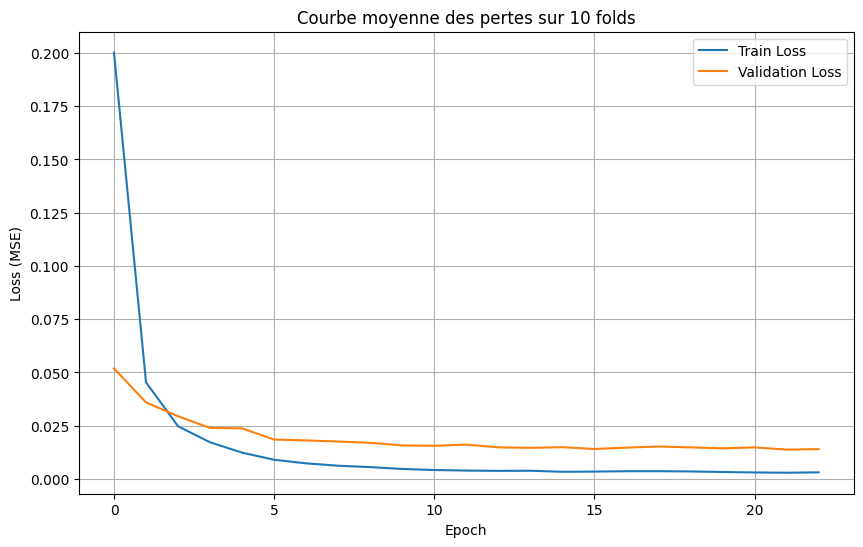

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Pour aligner toutes les courbes sur la même longueur (au cas où EarlyStopping stoppe à des moments différents)
max_len = min(len(l) for l in val_loss_histories_100)

avg_train_loss = np.mean([h[:max_len] for h in train_loss_histories_100], axis=0)
avg_val_loss = np.mean([h[:max_len] for h in val_loss_histories_100], axis=0)

plt.figure(figsize=(10,6))
plt.plot(avg_train_loss, label='Train Loss')
plt.plot(avg_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Courbe moyenne des pertes sur 10 folds')
plt.legend()
plt.grid(True)
plt.show()


The error is more significant here the approximation is better for the other file. We observe a Mean squared error of 0.01 in average on each epoch.

Let's use ridge et lasso regression to compare with our classical regression. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [8]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

MSE Ridge : 0.0000
MSE Lasso : 0.0004


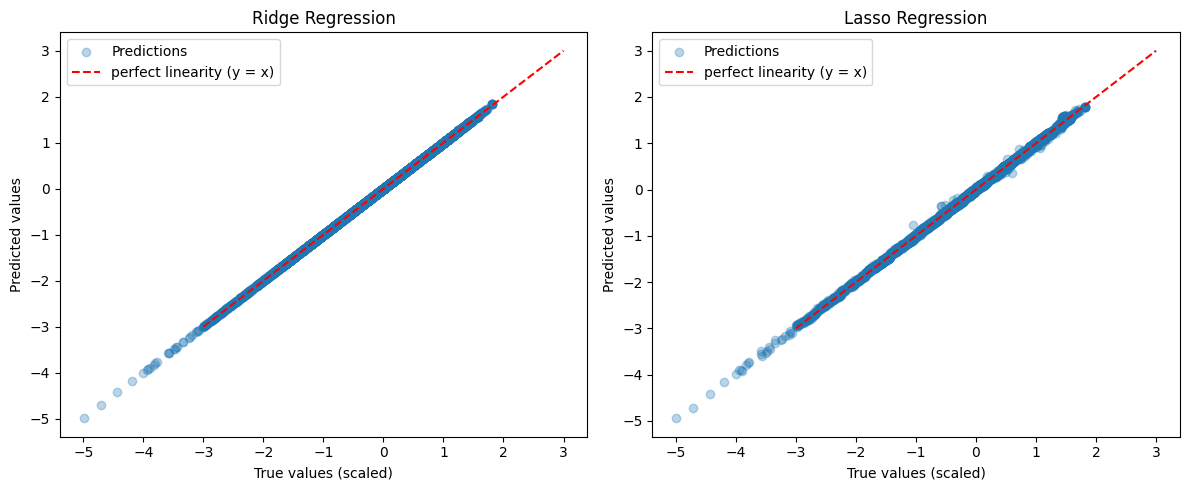

In [9]:
print(f"MSE Ridge : {mse_ridge:.4f}")
print(f"MSE Lasso : {mse_lasso:.4f}")

# Tracer la prédiction vs la vérité
plt.figure(figsize=(12, 5))

# Ridge plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.3, label='Predictions')
plt.plot([-3, 3], [-3, 3], 'r--', label='perfect linearity (y = x)')
plt.title("Ridge Regression")
plt.xlabel("True values (scaled)")
plt.ylabel("Predicted values")
plt.legend()

# Lasso plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.3, label='Predictions')
plt.plot([-3, 3], [-3, 3], 'r--', label='perfect linearity (y = x)')
plt.title("Lasso Regression")
plt.xlabel("True values (scaled)")
plt.ylabel("Predicted values")
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE Linear Regression : {mse:.6f}")


MSE Linear Regression : 0.000005


Let's do it now for 100 energy converters

In [18]:
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(features_100, target_100, test_size=0.2, random_state=42)

X_train_100 = scaler.fit_transform(X_train_100)
X_test_100 = scaler.transform(X_test_100)

y_train_100 = scaler.fit_transform(y_train_100.reshape(-1, 1)).flatten()
y_test_100 = scaler.transform(y_test_100.reshape(-1, 1)).flatten()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_100, y_train_100)
y_pred_ridge_100 = ridge.predict(X_test_100)
mse_ridge_100 = mean_squared_error(y_test_100, y_pred_ridge_100)

# Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_100, y_train_100)
y_pred_lasso_100 = lasso.predict(X_test_100)
mse_lasso_100 = mean_squared_error(y_test_100, y_pred_lasso_100)

MSE Ridge : 0.0000
MSE Lasso : 0.0015


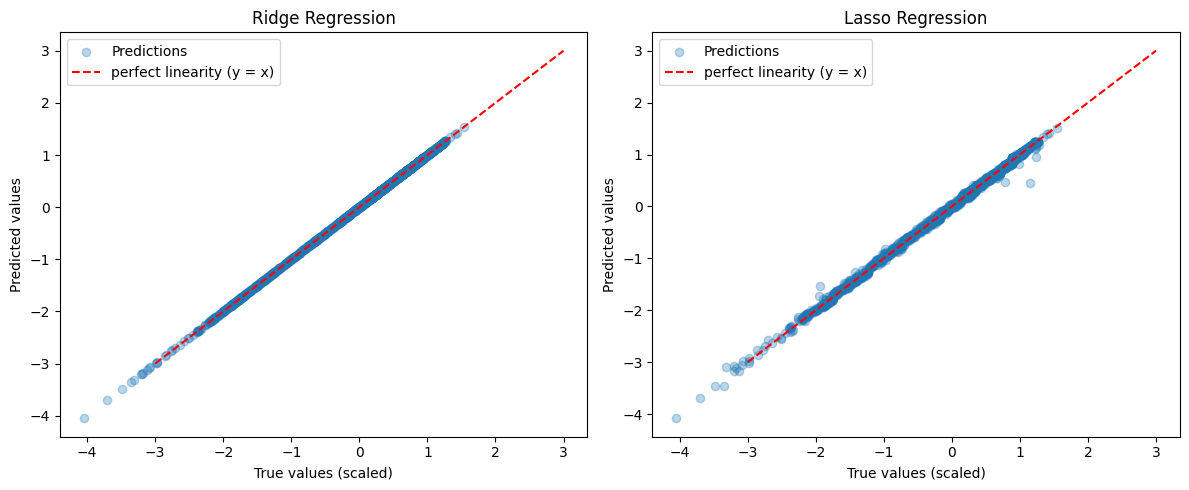

In [19]:
print(f"MSE Ridge : {mse_ridge_100:.4f}")
print(f"MSE Lasso : {mse_lasso_100:.4f}")

# Tracer la prédiction vs la vérité
plt.figure(figsize=(12, 5))

# Ridge plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_100, y_pred_ridge_100, alpha=0.3, label='Predictions')
plt.plot([-3, 3], [-3, 3], 'r--', label='perfect linearity (y = x)')
plt.title("Ridge Regression")
plt.xlabel("True values (scaled)")
plt.ylabel("Predicted values")
plt.legend()

# Lasso plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_100, y_pred_lasso_100, alpha=0.3, label='Predictions')
plt.plot([-3, 3], [-3, 3], 'r--', label='perfect linearity (y = x)')
plt.title("Lasso Regression")
plt.xlabel("True values (scaled)")
plt.ylabel("Predicted values")
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_100, y_train_100)

# Prédiction
y_pred_100 = lin_reg.predict(X_test_100)
mse = mean_squared_error(y_test_100, y_pred_100)
print(f"MSE Linear Regression : {mse:.6f}")


MSE Linear Regression : 0.000000
